## Packages

### Install

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install plotly

In [7]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -U statsmodels

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


### Import

In [14]:
import numpy as np # for scientific computing
import pandas as pd # a fundamental and powerful package for data analysis and manipulation
import seaborn as sns # seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import pyreadstat # for reading .sav file
import warnings # to filter warnings
import requests # Requests will allow you to send HTTP/1.1 requests using Python
import time # This module provides various time-related functions
import matplotlib.pyplot as plt # matplotlib is a library to plot graphs in Python
from matplotlib.pyplot import figure # Plot graph
from scipy import stats # it contains a large number of statistics, probability distributions functions

from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split # for separating train and test data, scaling, model building, ...
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.model_selection import RandomizedSearchCV # Randomized search on hyper parameters
from sklearn.model_selection import GridSearchCV # Exhaustive search over specified parameter values for an estimator
from sklearn.metrics import roc_curve, roc_auc_score #Evaluate ROC curve
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
from sklearn.metrics import cohen_kappa_score # a score that expresses the level of agreement between two annotators on a classification problem
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics
from sklearn.metrics import plot_confusion_matrix # plot confusion matrix
from sklearn.metrics import accuracy_score # Accuracy classification score
from sklearn.metrics import recall_score # Recall score
from sklearn.metrics import confusion_matrix # ompute confusion matrix to evaluate the accuracy of a classification

from sklearn.manifold import TSNE # To visualize high dimensional data
from sklearn.decomposition import PCA # PCA Analysis
from sklearn.pipeline import Pipeline # Pipeline to connect scalers and classifiers
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.ensemble import RandomForestClassifier # A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
from sklearn.ensemble import AdaBoostClassifier # An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases
from sklearn.naive_bayes import GaussianNB # A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution

from sklearn import preprocessing # provides the StandardScaler utility class, which is a quick and easy way to perform operations
from sklearn.preprocessing import StandardScaler # To normalize the data for KNNImputer
from sklearn.impute import KNNImputer # Imputation for completing missing values using k-Nearest Neighbors
from sklearn.impute import IterativeImputer # Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler# Implementation of SMOTE - Synthetic Minority Over-sampling Technique , ADASYN, ROSE
from imblearn.combine import SMOTEENN # Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours
from xgboost import XGBClassifier # A boosting algorithm based on gradient boosted decision trees algorithm
from boruta import BorutaPy # Boruta is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error
from collections import Counter # A Counter is a container that keeps track of how many times equivalent values are added


In [15]:
#To record the time taken to run the script
start = time.time()

In [16]:
# to ignore deprecation warnings
warnings.filterwarnings('ignore')

## 1. Read Data

In [17]:
# Download the SAV file, reading data as a data frame, setting ID as the index and getting the number of rows and columns
url = 'https://www.dropbox.com/s/g0ih98fpsmpn7cm/secom_mod.SAV?dl=1'
r = requests.get(url, allow_redirects=True)
open('secom_mod.SAV', 'wb').write(r.content)
df = pd.DataFrame(pd.read_spss("secom_mod.SAV"))
df = df.set_index('ID')
df.shape

(1567, 592)

## 2. Explore data

### 2.1 Shape and type

In [18]:
# shape of the data set
print('Shape: ',df.shape)  

Shape:  (1567, 592)


In [19]:
# checking data types of the features
print(df.info(),"\n")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1567 entries, 1.0 to 1567.0
Columns: 592 entries, class to feature590
dtypes: float64(591), object(1)
memory usage: 7.1+ MB
None 

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object


### 2.2 Duplicates

In [20]:
# Check for number of duplicated rows
df.duplicated().sum()

0

In [21]:
# Check for number of duplicated columns
df.T.iloc[:,:].duplicated().sum()

104

In [22]:
# Analyzing the duplicate columns
df_duplicated = df.T.iloc[2:592,:].duplicated()
duplicate_columns = df_duplicated[df_duplicated == True]
df[duplicate_columns.index]

,feature150,feature180,feature187,feature190,feature192,feature193,feature194,feature195,feature227,feature230,...,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539
ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1564.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Checking all unique values without NA's in the duplicated columns
duplicated = df[duplicate_columns.index].dropna()
np.unique(np.array(duplicated))

array([0.])

##### Note : There are no duplicates in the rows. Duplicated columns only have 0 and NaN values. This will be tackled in the rough feature removal phase of data cleaning.

### 2.3 Pass / Fail ratio

In [24]:
# number of pass and fail values
df['class'].value_counts()

0.0    1472
1.0      95
Name: class, dtype: int64

In [25]:
# pie chart of the target variable
def ClassDistributionGraph(df, title):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    
    labels = ['Pass', 'Fail']
    distribution = df.value_counts()
    colors = ['lightblue', 'yellowgreen']

    # Plot
    plt.pie(distribution, labels=labels, colors=colors, autopct= lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*distribution.sum()), shadow=True, startangle=140,)
    plt.title(title, fontsize=15)
    plt.axis('equal')
    plt.show()

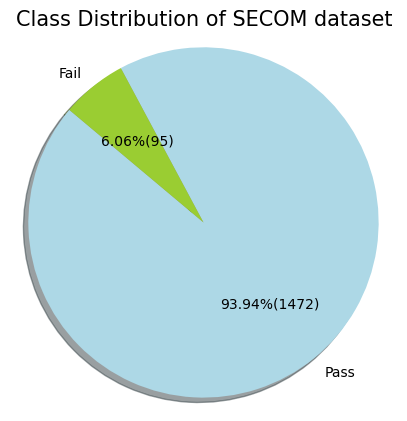

In [26]:
ClassDistributionGraph(df['class'], 'Class Distribution of SECOM dataset')

##### Note : Pass/ Fail ratio is approximately 15:1.

### 2.4 Histogram of features

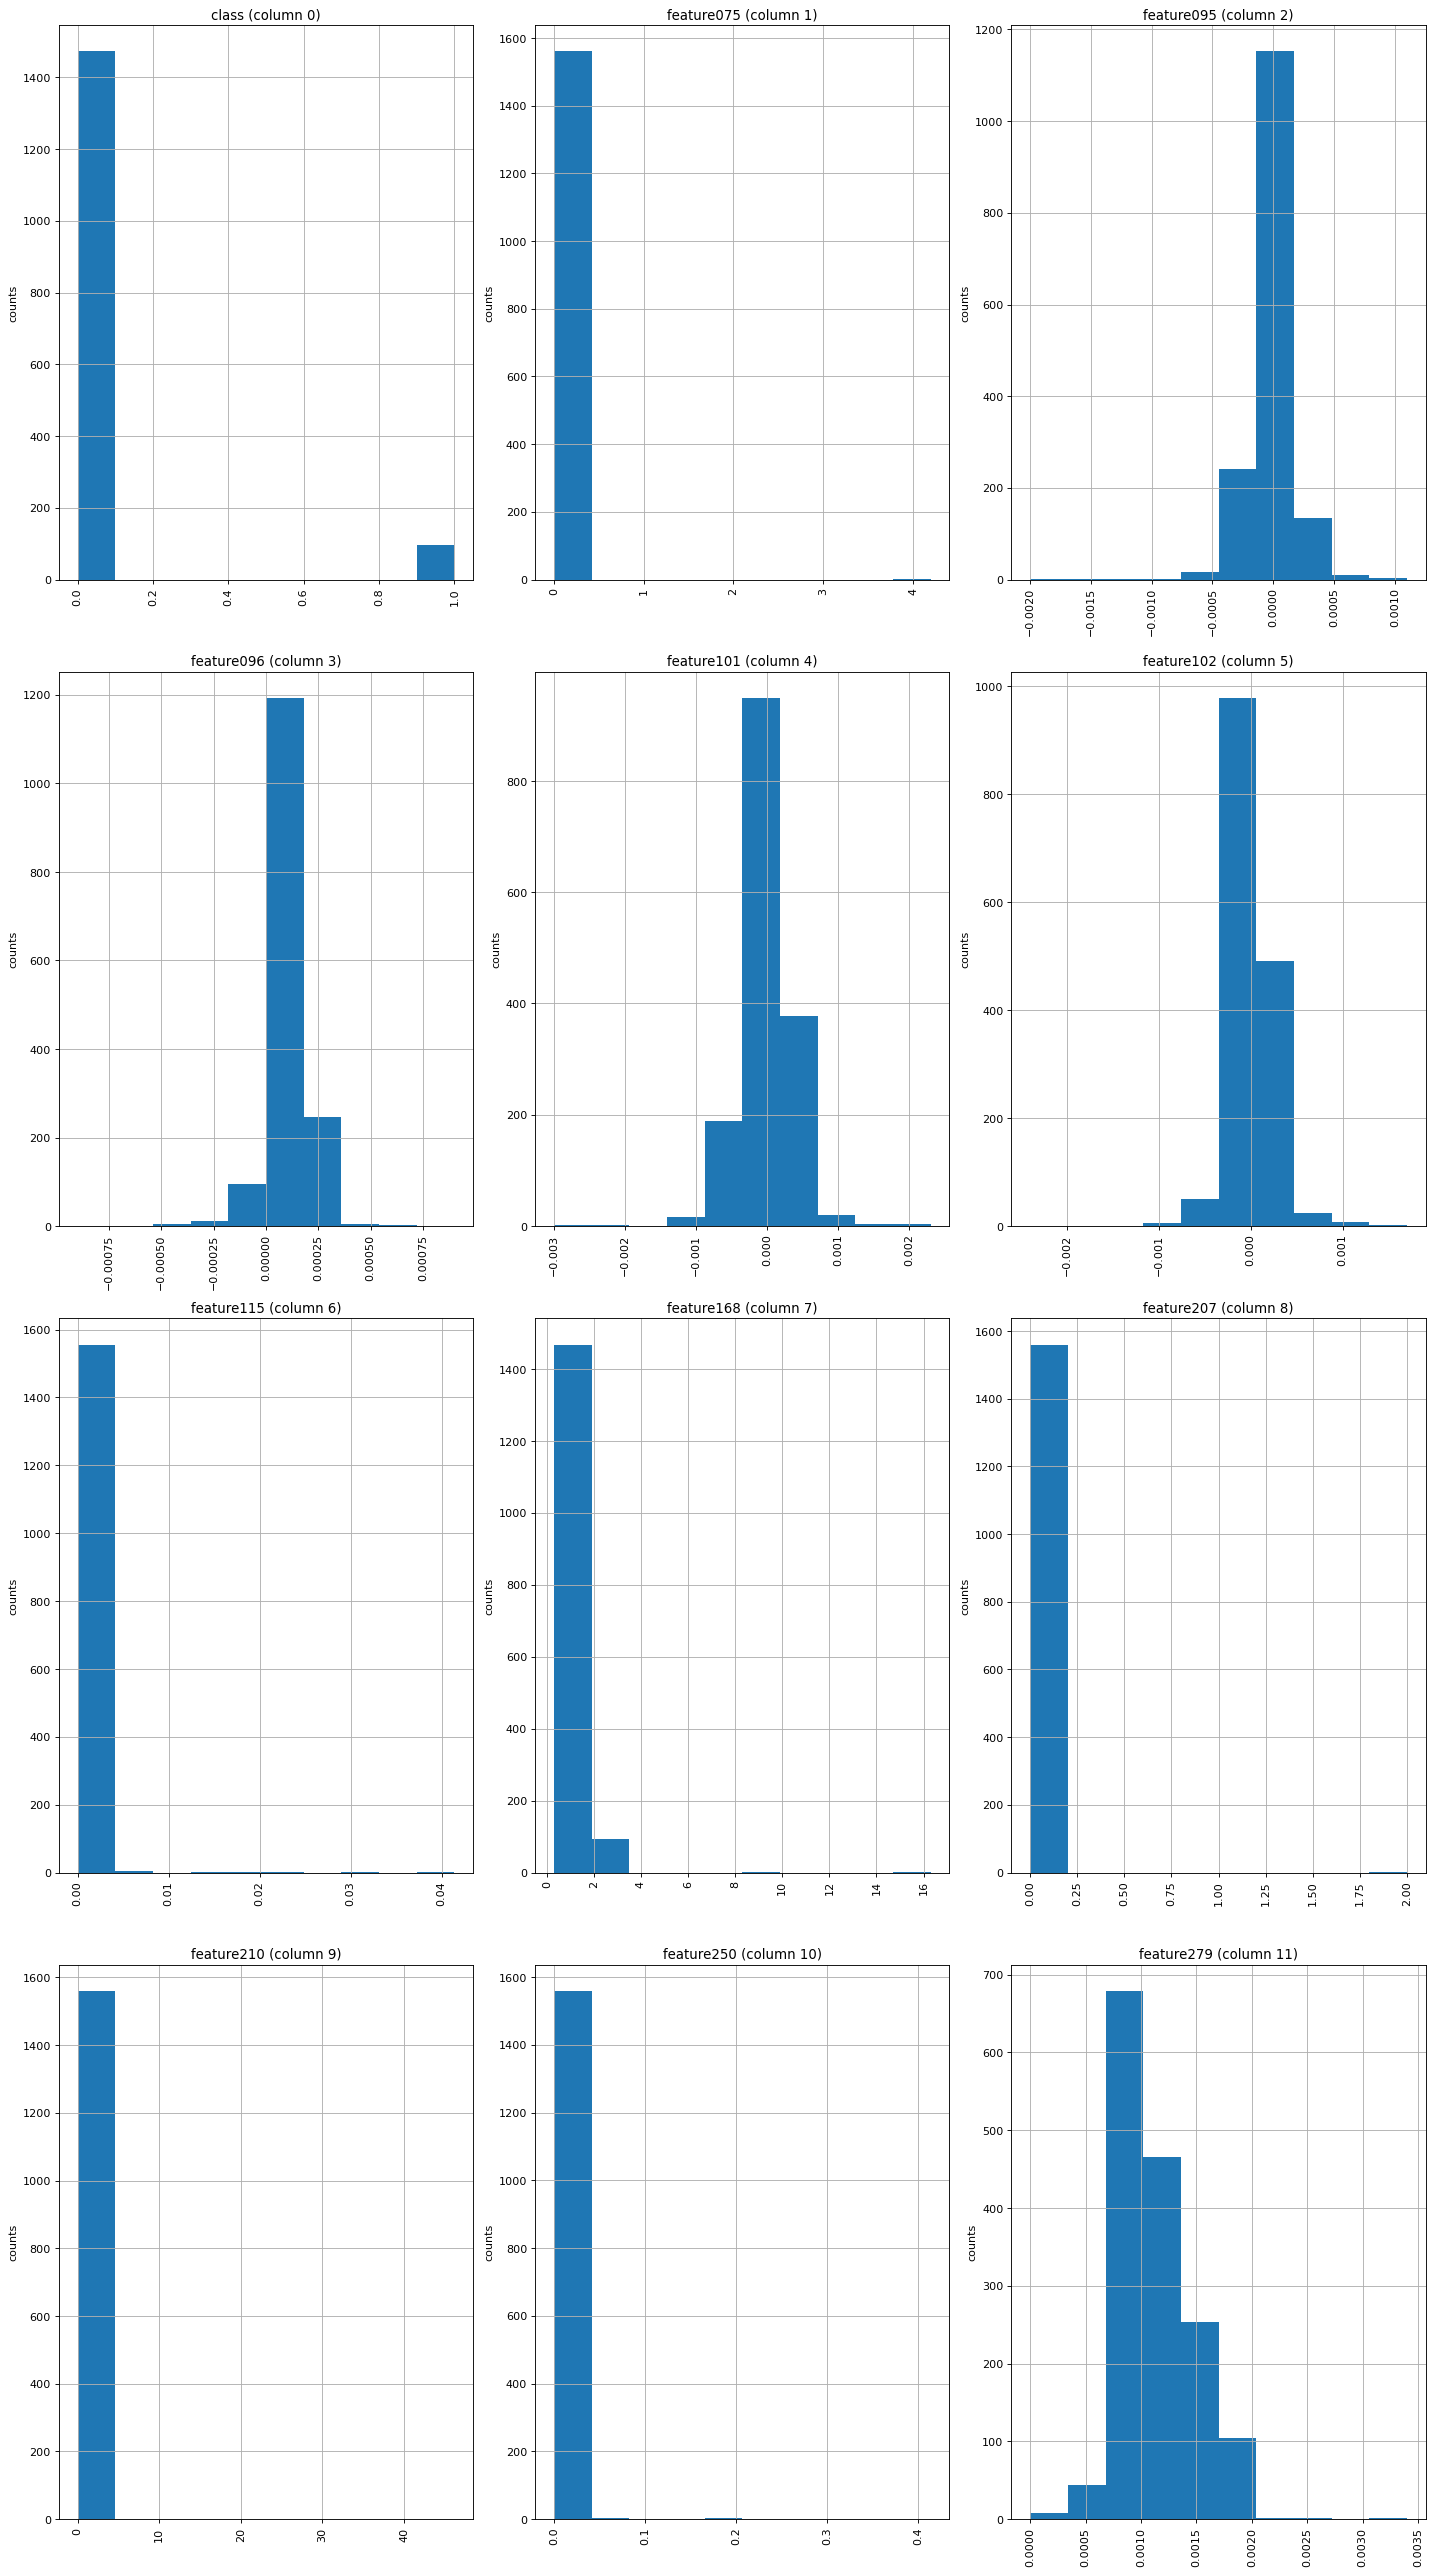

In [27]:
# histogram of some of the features
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
 
    
    nunique = df.nunique()
    df = df[nunique[(nunique>1)&(nunique<50)].index] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    %matplotlib inline
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
   

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 12, 3)

### 2.5 Correlation

In [28]:
# Correlation Histogram

def correlation(df):
    cor_matrix = pd.DataFrame(df.corr())

    # Remove reuntant values by selecting only the upper correlation triangle
    upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool)))

    # Convert the upper correlation triangle to a Series
    corlist = pd.Series(upper_tri.values.ravel('F'))

    # Correlation Histogram
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    # Plot Histogram on x
    plt.hist(corlist, bins =50)
    plt.gca().set(title='Frequency Histogram of Correlation', ylabel='Frequency', xlabel='Correlation coefficient');

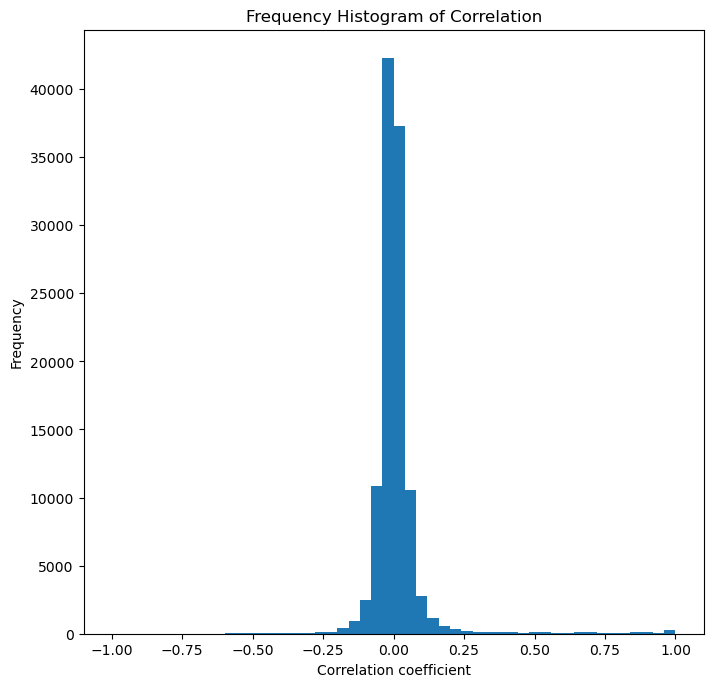

In [29]:
correlation(df)

##### Note : Most of the correlation between the features are within (-0.25, 0.25)

### 2.6 Missing values

In [30]:
# Total number of Nan values in the dataframe
df.isna().sum().sum()

41951

In [31]:
# number of cols with Nan values
nan_cols = pd.DataFrame(df.isna().sum())[pd.DataFrame(df.isna().sum()).iloc[:,0]!=0]
print('number of columns with missing values = ', len(nan_cols))

# number of rows with Nan values
nan_rows = pd.DataFrame(df.T.isna().sum())[pd.DataFrame(df.T.isna().sum()).iloc[:,0]!=0]
print('number of rows with missing values = ', len(nan_rows))

number of columns with missing values =  538
number of rows with missing values =  1567


##### Note : All rows have missing values. Therefore imputation techniques must be used to tackle the missing values.

## 3. Preprocessing

In [32]:
# Give text labels to the training examples
df['class'] = df['class'].replace({0: "PASS", 1: "FAIL"})
df.tail()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1563.0,PASS,16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1564.0,PASS,16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1565.0,PASS,17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1566.0,PASS,17/10/2008 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941
1567.0,PASS,17/10/2008 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,...,0.0045,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844


## 4. Data Preparation

### 4.1 Splitting Traninig and Test Data

In [33]:
# Split df into X and y
y = df['class']
X = df.drop('class', axis=1)

In [34]:
# Train-test split
X_train, X_test , y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle=True, random_state=100, stratify=y)

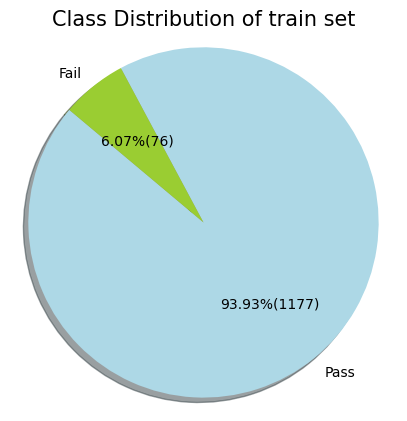

In [35]:
# pie chart for the train set
ClassDistributionGraph(y_train, 'Class Distribution of train set')

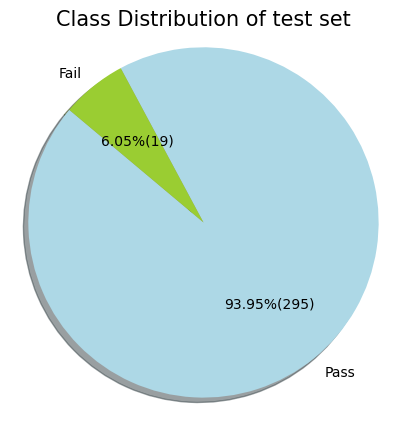

In [36]:
# pie chart for the test set
ClassDistributionGraph(y_test, 'Class Distribution of test set')

##### Note : Train and test data has the same ratio of pass/fail as the actual dataset.

### 4.2 Rough feature reduction

#### 4.2.1 Removal of timestamp

In [37]:
# removing timestamp
X_train= X_train.drop(columns='timestamp')

#### 4.2.2 Removal of constants

In [38]:
#columns that have the same value excluding nan
print(len(X_train.columns[X_train.nunique() == 1]))

#column names with same value in it
X_train.columns[X_train.nunique() == 1]
print(list(X_train.columns[X_train.nunique() == 1]))

#remove these columns since it adds no value
single_value_columns = list(X_train.columns[X_train.nunique() == 1])
X_train=X_train.drop(columns=single_value_columns)
X_train

116
['feature006', 'feature014', 'feature043', 'feature050', 'feature053', 'feature070', 'feature098', 'feature142', 'feature150', 'feature179', 'feature180', 'feature187', 'feature190', 'feature191', 'feature192', 'feature193', 'feature194', 'feature195', 'feature227', 'feature230', 'feature231', 'feature232', 'feature233', 'feature234', 'feature235', 'feature236', 'feature237', 'feature238', 'feature241', 'feature242', 'feature243', 'feature244', 'feature257', 'feature258', 'feature259', 'feature260', 'feature261', 'feature262', 'feature263', 'feature264', 'feature265', 'feature266', 'feature267', 'feature277', 'feature285', 'feature314', 'feature315', 'feature316', 'feature323', 'feature326', 'feature327', 'feature328', 'feature329', 'feature330', 'feature331', 'feature365', 'feature370', 'feature371', 'feature372', 'feature373', 'feature374', 'feature375', 'feature376', 'feature379', 'feature380', 'feature381', 'feature382', 'feature395', 'feature396', 'feature397', 'feature398', '

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
240.0,3061.98,2344.91,2197.2667,911.2054,1.3257,104.1722,0.1208,1.3595,0.0063,-0.0034,...,0.0052,78.5378,0.4915,0.0114,0.0031,2.3265,0.0235,0.0184,0.0052,78.5378
183.0,2928.03,2497.03,2221.9444,1551.6947,1.5296,99.2678,0.1222,1.4494,-0.0013,0.0042,...,0.0081,264.7525,0.5005,0.0203,0.0052,4.0460,0.0077,0.0204,0.0081,264.7525
971.0,3066.18,2539.01,2180.5556,1165.1351,0.7892,101.4578,0.1226,1.4454,0.0177,0.0017,...,0.0053,71.0108,0.4999,0.0174,0.0046,3.4860,0.0223,0.0159,0.0053,71.0108
193.0,2956.64,2436.12,2139.2667,1123.3450,1.3699,102.2522,0.1254,1.3840,-0.0150,0.0095,...,NaN,NaN,0.4948,0.0149,0.0036,3.0214,0.0112,0.0191,0.0058,170.4645
1240.0,2937.77,2532.30,2198.8556,1031.1917,1.3204,102.7622,0.1235,1.4294,0.0138,0.0052,...,NaN,NaN,0.5019,0.0146,0.0039,2.8997,0.0193,0.0072,0.0026,37.6251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041.0,3021.61,2440.29,2227.2222,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,...,NaN,NaN,0.5091,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
128.0,3100.44,2690.99,2239.4223,1997.3782,1.5397,98.3356,0.1229,1.5430,0.0059,-0.0057,...,NaN,NaN,0.4998,0.0162,0.0034,3.2350,0.0201,0.0379,0.0118,188.2987
431.0,2956.84,2592.29,2217.3777,1425.1041,1.7585,106.2556,0.1200,1.5383,-0.0268,-0.0010,...,NaN,NaN,0.5009,0.0124,0.0035,2.4736,0.0142,0.0156,0.0044,109.5996


In [39]:
#duplicates 
X_train.T.iloc[:,:].duplicated().sum()

0

##### Note : All duplicated rows and single value columns are removed in this step.

#### 4.2.3 Checking for columns with most nan values

In [40]:
# count the number of missing values for each column
num_missing = pd.DataFrame((X_train.isna()).sum())
print(num_missing.sort_values(0))

               0
feature590     0
feature115     0
feature114     0
feature387     0
feature388     0
...          ...
feature359  1068
feature293  1140
feature294  1140
feature158  1140
feature159  1140

[474 rows x 1 columns]


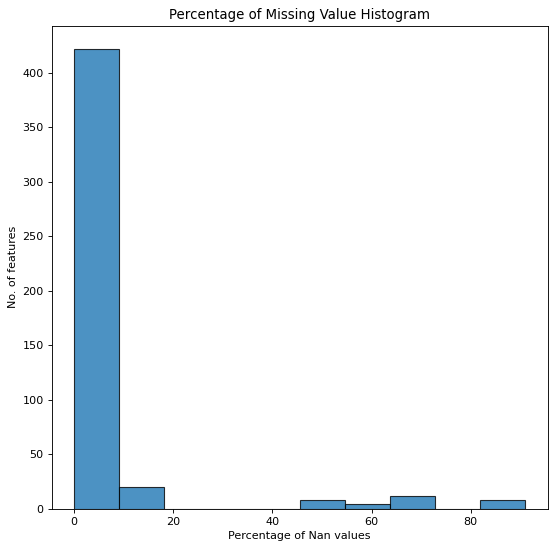

In [41]:
# Missing Value histogram
nan_perc = pd.DataFrame(round((X_train.isnull().sum() * 100/ len(X_train)),2))
nan_perc = nan_perc.reset_index()
nan_perc = nan_perc.rename({'index': 'feature', 0: 'percentage'}, axis=1)

%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':80})
n,bins,patch = plt.hist(nan_perc['percentage'],bins=10, alpha=0.8, label='Value', edgecolor='black', linewidth=1)
plt.gca().set(title='Percentage of Missing Value Histogram', ylabel='No. of features', xlabel='Percentage of Nan values')
plt.show()

In [42]:
# Defining a threshold to remove the values above it
threshold= 0.7
pct_null = X_train.isnull().sum() / len(X_train)
missing_value_cols = pct_null[pct_null >= threshold].index

# number of features containing more than 55% missing values
print(len(missing_value_cols))
print(missing_value_cols)

X_train = X_train.drop(missing_value_cols, axis=1)

8
Index(['feature086', 'feature158', 'feature159', 'feature221', 'feature293',
       'feature294', 'feature359', 'feature493'],
      dtype='object')


##### Note : Features that have more than 55% of missing values were removed and models were evaluated. However, removing more than 70% produced better results. Therefore, 70% was set as the threshold and a total of 8 features are removed.

#### 4.2.4 Less volatile

In [43]:
# Exploring  remaining features
summary = X_train.iloc[:,:].describe(include='all')

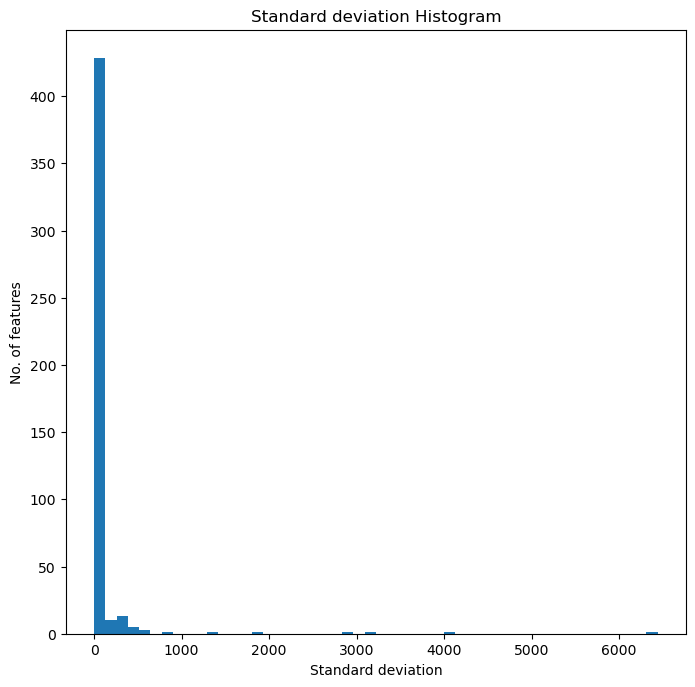

In [44]:
# Checking std of remaining features

def StandardDeviation(df):
    import matplotlib.pyplot as plt

    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std(), bins = 50)
    plt.gca().set(title='Standard deviation Histogram', ylabel='No. of features', xlabel='Standard deviation');
    plt.show()
    
StandardDeviation(X_train)

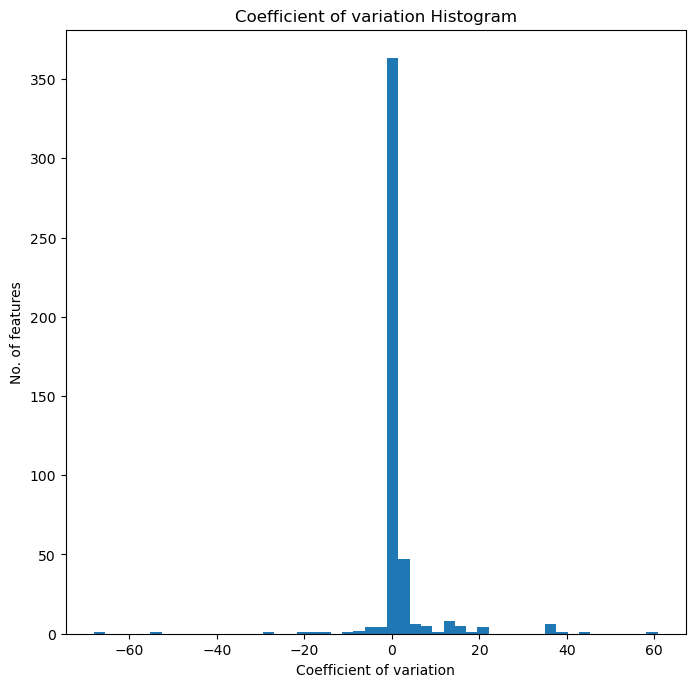

In [45]:
# Checking coeff std of remaining features
def CoefficientOfVariation(df):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std()/df.mean(), bins = 50)
    plt.gca().set(title='Coefficient of variation Histogram', ylabel='No. of features', xlabel='Coefficient of variation');
    plt.show()

CoefficientOfVariation(X_train)

<AxesSubplot:>

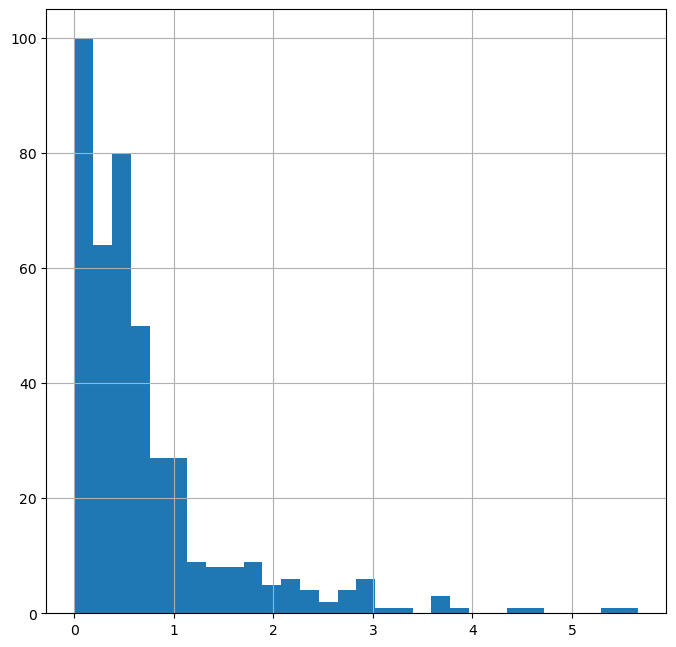

In [46]:
# histogram of the coefficient standard deviation of a percentage of features with the least coeffstd
feature_coeffstd = pd.DataFrame(summary.loc['std',:]/abs(summary.loc['mean',:])).sort_values(by=[0])
percentage_features = int(len(feature_coeffstd)*90/100)
feature_coeffstd.iloc[0:percentage_features,0].hist(bins=30)

In [47]:
# a percentage of features with the least coeffstd to remove
percentageToAnalyze = 0

percentage_features_rm = int(len(feature_coeffstd)*percentageToAnalyze/100)
feature_index = feature_coeffstd.index
features_least_volatile = feature_index[0:percentage_features_rm]
print("Number of least Volatiles", len(features_least_volatile))
print(features_least_volatile)

Number of least Volatiles 0
Index([], dtype='object')


In [48]:
# dropping a percentage of features with the least coeffstd
X_train.drop(features_least_volatile, axis = 1, inplace = True)

##### Note : 0%, 2% and 5% of the least volatile features were removed and the models were compared. Better models were obtained when no features were moved in this step. Therefore we set the percentageToAnalyze = 0.


### 4.3 Outlier Identification

In [49]:
# To check number of NA values before Outlier treatment
X_train.isna().sum().sum()

23889

In [50]:
# Funtion for Outlier treatment
def Outlier(X, outlier_treatment) :
    
    if outlier_treatment == 'NaN' :
        # calculating the z score of the values
        z_train= pd.DataFrame(stats.zscore(X,nan_policy='omit'))
        z_train

        # calculating the number of outliers
        print('Number of Outliers : ',sum(z_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0)))))

        #Outlier treatment : replacing outliers with NA to impute all NA values
        is_outlier = abs(z_train)>3
        is_outlier.columns = X.columns
        is_outlier.index = X.index
        return(X.mask(is_outlier, np.nan))
    
    elif outlier_treatment == '3s':
        boundary = 3
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
        X = X.apply(lambda x : [y if y < boundary or np.isnan(y) else boundary for y in x])
        X = X.apply(lambda x : [y if y > -1*boundary or np.isnan(y) else -1*boundary for y in x])
        
        # for inverse transformation
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        X_inverse.columns = X.columns
        return(X_inverse)




In [51]:
# Outlier treatment with NA values
X_train = Outlier(X_train, 'NaN')

Number of Outliers :  4873


In [52]:
# To check if all outliers are successfully replaced with NA values
X_train.isna().sum().sum()

28762

##### Note : 4873 outliers were found based on zscore values. These can be treated with "NA" or "3s" boundary. Models were analyzed with both the treatment methods and it was found that "NA" treatment yielded better models. 

### 4.4 Missing value Imputation

#### 4.4.1 Define function for imputation

In [53]:
# function for imputing missing values
def MissingValueImputation(X, Imputer) :
    
    if Imputer == 'KNN' :
        
        #Scaling
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
        
        #define imputer
        KNN_imputer = KNNImputer(n_neighbors=10, weights = 'uniform')

        #fit on the dataset
        X = KNN_imputer.fit_transform(X)
        
        #Inverse tranform of scaling
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        return(X_inverse)
        
    elif Imputer == 'MICE' :
        
        #define imputer
        MICE_imputer = IterativeImputer(max_iter=20, sample_posterior=False, random_state=100)
        
        #fit dataset
        return(MICE_imputer.fit_transform(X))

#### 4.4.2 KNN

In [54]:
# impute using knn
X_train_KNN = X_train.copy(deep=True)
X_train_KNN.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'KNN'))

In [55]:
X_train_KNN.isna().sum().sum()

0

#### 4.4.3 MICE

In [56]:
# impute using mice
X_train_MICE = X_train.copy(deep=True)
X_train_MICE.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'MICE'))

In [57]:
X_train_MICE.isna().sum().sum()

0

#### 4.4.4 Evaluation of imputation

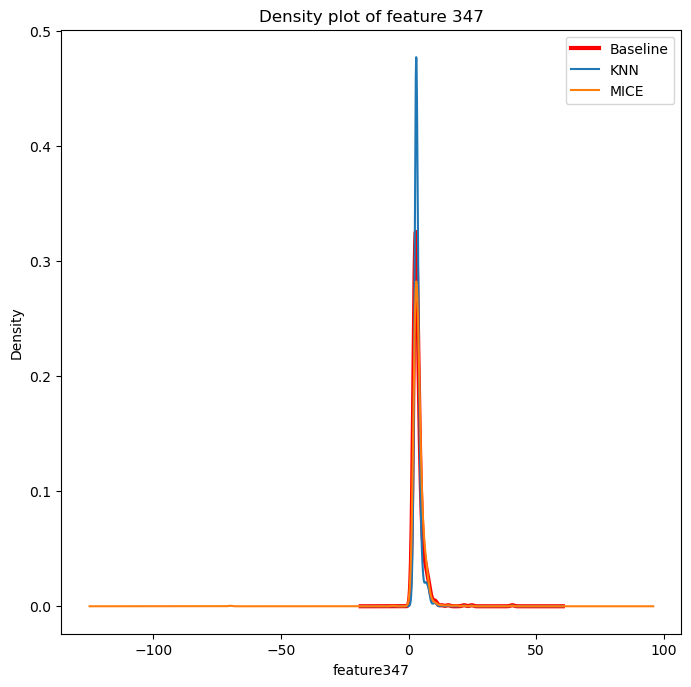

In [58]:
# Visualization of a variable with most missing values

X_train['feature347'].plot(kind='kde',c='red',linewidth=3)
X_train_KNN['feature347'].plot(kind='kde')
X_train_MICE['feature347'].plot(kind='kde')
labels = ['Baseline', 'KNN','MICE']
plt.legend(labels)
plt.xlabel('feature347')
plt.gca().set(title='Density plot of feature 347');

80


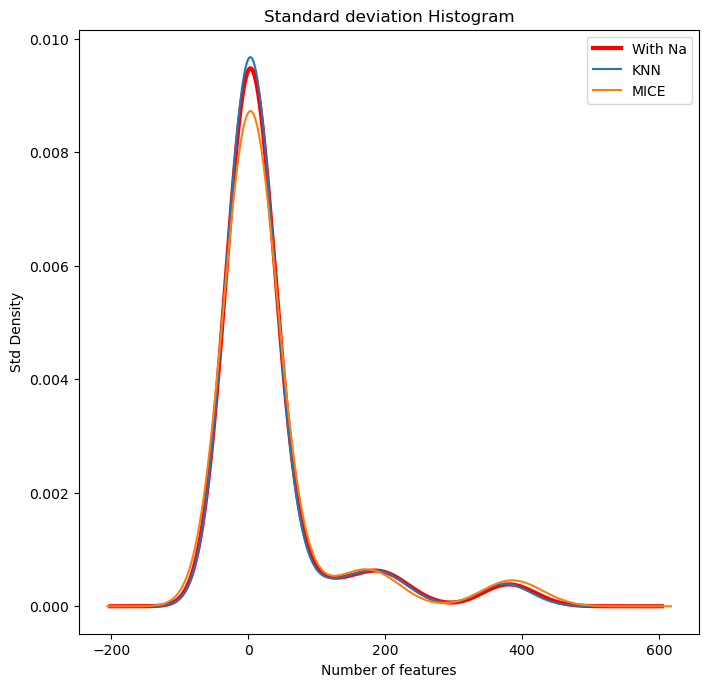

In [59]:
# plot the std of the features with more than 3% of missing values before and after imputation with knn and mice
feature_missing_sum = pd.DataFrame((X_train.isna()).sum())
percentage_missing_filter = 3/100
feature_filter = feature_missing_sum[feature_missing_sum[0]>=(len(X_train.loc[:,])*percentage_missing_filter)].index

print(len(feature_filter))

summary_with_na = X_train[feature_filter].describe(include='all')
feature_std_with_na = pd.DataFrame(summary_with_na.loc['std',:])
feature_std_sort_with_na = feature_std_with_na.sort_values(by=['std'])

summary_knn = X_train_KNN[feature_filter].describe(include='all')
feature_std_knn = pd.DataFrame(summary_knn.loc['std',:])
feature_std_sort_knn = feature_std_knn.sort_values(by=['std'])

summary_mice = X_train_MICE[feature_filter].describe(include='all')
feature_std_mice = pd.DataFrame(summary_mice.loc['std',:])
feature_std_sort_mice = feature_std_mice.sort_values(by=['std'])

feature_std_sort_with_na.iloc[:,0].plot(kind='kde',c='red',linewidth=3)
feature_std_sort_knn.iloc[:,0].plot(kind='kde')
feature_std_sort_mice.iloc[:,0].plot(kind='kde')
labels = ['With Na', 'KNN','MICE']
plt.legend(labels)
plt.gca().set(title='Standard deviation Histogram', ylabel='Std Density', xlabel='Number of features');

##### Note : Imputation methods KNN and MICE were evaluated using different models. MICE with 20 iterations yielded better results and therfore used to do the modelling.

### 4.5 Feature Selection

#### 4.5.1 Boruta

In [60]:
#Boruta function

def BorutaFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    # define random forest classifier
    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=100)
    model.fit(X, y)
    
    # define Boruta feature selection method
    feature_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=100, max_iter=200)

    # find all relevant features
    feature_selector.fit(X.to_numpy(),y)

    # check selected features
    feature_selector.support_

    # check ranking of features
    feature_selector.ranking_

    # zip feature names, ranks, and decisions 
    feature_ranks = list(zip(feature_names, 
                             feature_selector.ranking_, 
                             feature_selector.support_))

    # print the results
    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features = list()
    indexes = np.where(feature_selector.support_ == True)
    for x in np.nditer(indexes):
        final_features.append(feature_names[x])
    print(final_features)
    
 # call transform() on X to filter it down to selected features
    return pd.DataFrame(X.filter(final_features)) , final_features



In [61]:
# apply Boruta and store selected features in the variable
X_train , final_features = BorutaFeatureSelection(X_train_MICE,y_train)

Iteration: 	1 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	2 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	3 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	4 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	5 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	6 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	7 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	8 / 200
Confirmed: 	0
Tentative: 	28
Rejected: 	438
Iteration: 	9 / 200
Confirmed: 	0
Tentative: 	28
Rejected: 	438
Iteration: 	10 / 200
Confirmed: 	1
Tentative: 	27
Rejected: 	438
Iteration: 	11 / 200
Confirmed: 	1
Tentative: 	27
Rejected: 	438
Iteration: 	12 / 200
Confirmed: 	3
Tentative: 	25
Rejected: 	438
Iteration: 	13 / 200
Confirmed: 	3
Tentative: 	25
Rejected: 	438
Iteration: 	14 / 200
Confirmed: 	3
Tentative: 	25
Rejected: 	438
Iteration: 	15 / 200
Confirmed: 	3
Tentative: 	25
Rejected: 	438
Iteration: 	16 / 200
Confirmed: 	3
Tentat

##### Note : Boruta, with 200 iterations, confirmed 20 features as part of the Feature Selection stage. There were 3 features termed as tentative. Models were evaluated using these tentative feaures. However, better results were obtained when these 3 variables were not considered in the final model.

#### 4.5.2 Overview of remaining features

In [62]:
# Descriptive statistics
X_train.describe()

,feature034,feature060,feature065,feature066,feature103,feature104,feature112,feature122,feature125,feature130,feature131,feature153,feature248,feature288,feature426,feature461,feature478,feature519,feature520,feature574
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,8.826481,2.819657,20.517941,26.874099,0.000637,-0.009812,231.847741,15.798943,15.796003,-0.559285,0.746599,0.615331,0.047026,0.183804,6.298992,28.985510,5.639907,1.583376,10.059669,0.312544
std,0.404115,8.176921,4.993771,6.427241,0.057171,0.002834,1.250945,0.098656,0.115282,1.218536,0.080880,0.539376,0.036756,0.166135,5.526954,12.259187,3.211522,0.361218,7.862429,0.134783
min,7.603200,-19.992700,6.448200,1.422072,-0.167200,-0.018500,228.838879,15.500000,15.468318,-3.779000,0.501300,0.154400,0.000000,0.058800,1.466600,7.953400,-70.951922,-4.163575,0.000000,0.043187
25%,8.580100,-1.870900,17.365500,22.983200,-0.035900,-0.011800,231.217733,15.730000,15.730000,-0.898800,0.688700,0.374000,0.025100,0.114800,3.774800,19.977300,4.113700,1.528301,5.439900,0.236300
50%,8.769600,1.002700,20.023600,26.217500,0.000000,-0.010100,231.806002,15.790000,15.780000,-0.141900,0.759100,0.467500,0.042922,0.139100,4.778100,26.152600,5.258700,1.585430,9.315800,0.290800
75%,9.035500,4.428200,22.855500,29.981500,0.031500,-0.008200,232.260475,15.870000,15.880000,0.047300,0.816200,0.697500,0.051716,0.199810,6.958700,35.669700,6.701100,1.652800,10.889781,0.361300
max,10.963400,29.750900,49.299598,103.608788,0.188800,-0.000700,236.954600,16.070000,16.100000,2.458000,0.888400,6.278200,0.251560,1.920200,67.682973,88.424878,23.100200,4.517100,55.165100,1.109300


In [63]:
#datatype and shape
print(X_train.info())
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1253 entries, 240.0 to 1364.0
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature034  1253 non-null   float64
 1   feature060  1253 non-null   float64
 2   feature065  1253 non-null   float64
 3   feature066  1253 non-null   float64
 4   feature103  1253 non-null   float64
 5   feature104  1253 non-null   float64
 6   feature112  1253 non-null   float64
 7   feature122  1253 non-null   float64
 8   feature125  1253 non-null   float64
 9   feature130  1253 non-null   float64
 10  feature131  1253 non-null   float64
 11  feature153  1253 non-null   float64
 12  feature248  1253 non-null   float64
 13  feature288  1253 non-null   float64
 14  feature426  1253 non-null   float64
 15  feature461  1253 non-null   float64
 16  feature478  1253 non-null   float64
 17  feature519  1253 non-null   float64
 18  feature520  1253 non-null   float64
 19  feature574  1253 no

array([[<AxesSubplot:title={'center':'feature034'}>,
        <AxesSubplot:title={'center':'feature060'}>,
        <AxesSubplot:title={'center':'feature065'}>,
        <AxesSubplot:title={'center':'feature066'}>],
       [<AxesSubplot:title={'center':'feature103'}>,
        <AxesSubplot:title={'center':'feature104'}>,
        <AxesSubplot:title={'center':'feature112'}>,
        <AxesSubplot:title={'center':'feature122'}>],
       [<AxesSubplot:title={'center':'feature125'}>,
        <AxesSubplot:title={'center':'feature130'}>,
        <AxesSubplot:title={'center':'feature131'}>,
        <AxesSubplot:title={'center':'feature153'}>],
       [<AxesSubplot:title={'center':'feature248'}>,
        <AxesSubplot:title={'center':'feature288'}>,
        <AxesSubplot:title={'center':'feature426'}>,
        <AxesSubplot:title={'center':'feature461'}>],
       [<AxesSubplot:title={'center':'feature478'}>,
        <AxesSubplot:title={'center':'feature519'}>,
        <AxesSubplot:title={'center':'feat

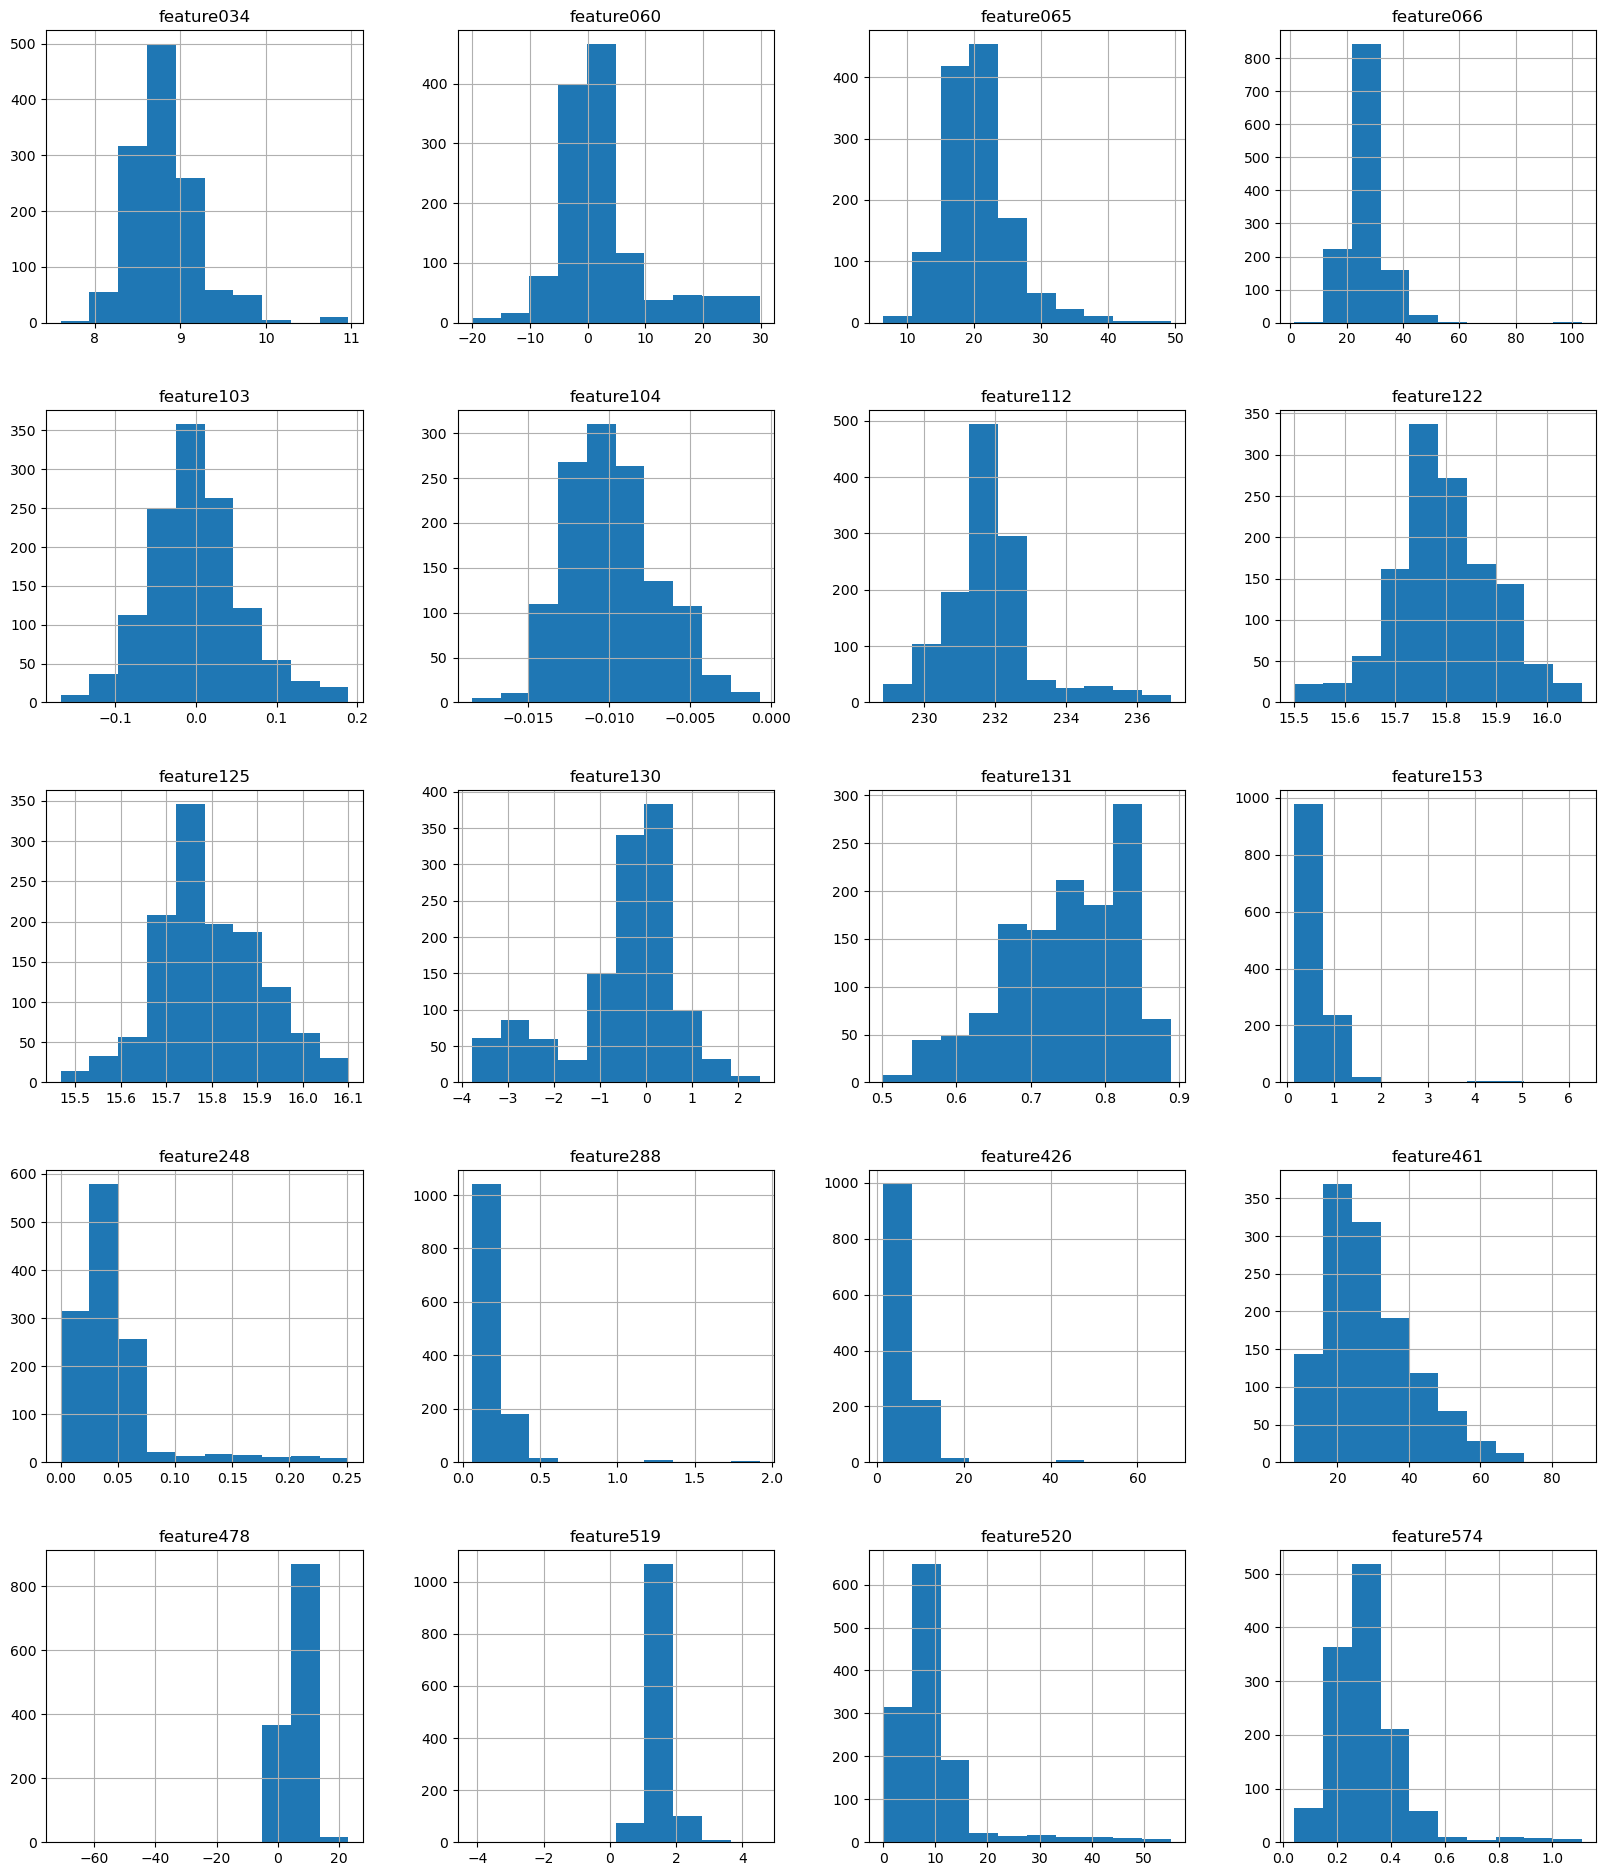

In [64]:
# Histogram of the features
X_train.hist(figsize=(20,24))

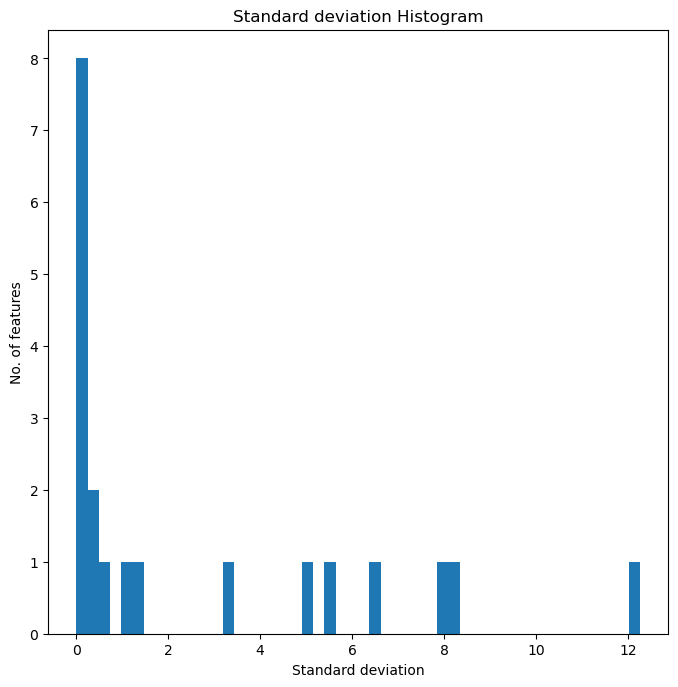

In [65]:
# Histogram of Standard Deviation of the remaining features
StandardDeviation(X_train)

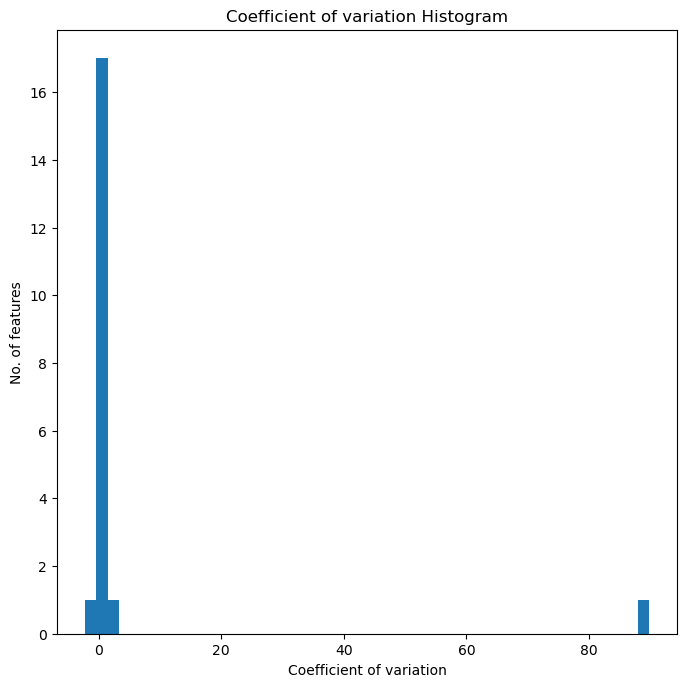

In [66]:
# Histogram of Coefficient of Standard Deviation of the remaining features
CoefficientOfVariation(X_train)

In [67]:
# Correlation of the remaining features

# Heatmap of correlation
corr = pd.DataFrame(X_train.corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,feature034,feature060,feature065,feature066,feature103,feature104,feature112,feature122,feature125,feature130,feature131,feature153,feature248,feature288,feature426,feature461,feature478,feature519,feature520,feature574
feature034,1.00,0.15,0.10,0.10,0.03,0.14,0.01,0.02,0.06,0.10,0.02,0.01,0.09,0.00,0.00,0.10,0.07,-0.01,0.09,0.04
feature060,0.15,1.00,-0.45,-0.39,0.04,0.34,-0.01,0.03,0.10,0.22,0.03,0.17,0.23,0.17,0.16,0.07,0.18,0.10,0.23,0.01
feature065,0.10,-0.45,1.00,0.90,-0.06,0.15,0.04,-0.08,-0.08,-0.03,0.01,-0.02,0.08,-0.02,-0.02,0.06,-0.09,-0.07,0.08,0.05
feature066,0.10,-0.39,0.90,1.00,-0.05,0.16,0.06,-0.08,-0.07,0.00,0.01,-0.02,0.12,-0.02,-0.02,0.02,-0.23,-0.18,0.10,0.03
feature103,0.03,0.04,-0.06,-0.05,1.00,0.04,0.01,0.03,0.01,0.04,0.09,-0.01,0.00,-0.01,-0.01,-0.03,-0.05,0.02,-0.00,0.07
feature104,0.14,0.34,0.15,0.16,0.04,1.00,-0.02,0.04,0.14,0.30,0.06,0.09,0.25,0.09,0.09,0.06,0.09,0.04,0.25,-0.02
feature112,0.01,-0.01,0.04,0.06,0.01,-0.02,1.00,-0.21,-0.11,0.19,-0.11,-0.03,0.07,-0.03,-0.03,0.02,0.05,-0.10,0.06,0.01
feature122,0.02,0.03,-0.08,-0.08,0.03,0.04,-0.21,1.00,0.91,0.03,0.25,0.09,-0.02,0.08,0.09,-0.00,0.02,-0.06,-0.01,-0.05
feature125,0.06,0.10,-0.08,-0.07,0.01,0.14,-0.11,0.91,1.00,0.20,0.14,0.11,0.03,0.10,0.12,0.03,0.07,-0.05,0.03,-0.04
feature130,0.10,0.22,-0.03,0.00,0.04,0.30,0.19,0.03,0.20,1.00,0.24,0.06,0.15,0.06,0.06,-0.01,0.12,-0.01,0.15,0.00


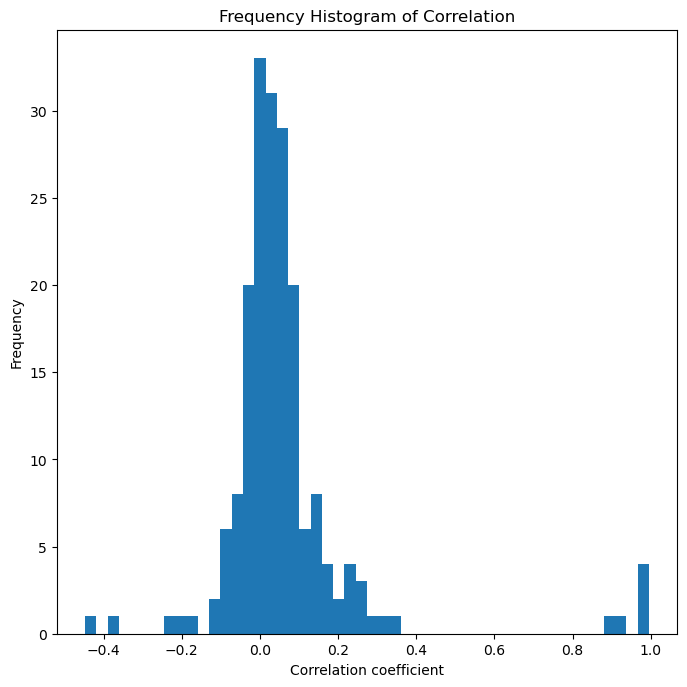

In [68]:
# Histogram of the Correlation of the remaining features
correlation(X_train)

##### Note : Final 20 features were closely analyzed and studied. Most of them are not correlated and have a value within (-0.2,0.4). A couple of features are highly correlated with eachother , but since our models are mostly tree-based algorithms, multicollinearity is not much of an issue.

## 5. Modeling

### 5.1 Imbalance Treatment

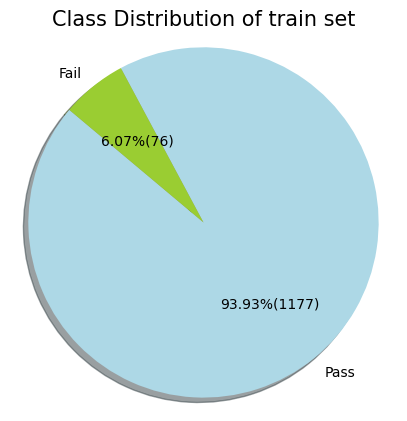

In [69]:
#Pie chart of the imbalanced train data
ClassDistributionGraph(y_train, 'Class Distribution of train set')

In [70]:
# Sampling technique

def Sampling(X_train, y_train, sampler):

    #SMOTE
    if sampler == 'SMOTE':
        sampler = SMOTE(random_state=100)    
    
    #ROSE
    if sampler == 'ROSE':
        sampler = RandomOverSampler(random_state=100)

    #ADASYN
    if sampler == 'ADASYN':
        sampler = ADASYN(random_state=100)
    

    #SMOTTEENN
    if sampler == 'SMOTEENN' :
        sampler = SMOTEENN(random_state=100)
        
    #SMOTETomek
    if sampler == 'SMOTETomek':
        from imblearn.combine import SMOTETomek 
        sampler = SMOTETomek(random_state=100)
        
    #BorderlineSMOTE
    if sampler == 'BorderlineSMOTE':
        from imblearn.over_sampling import BorderlineSMOTE 
        sampler = BorderlineSMOTE(random_state=100)

    if sampler == "randomunder":
        from imblearn.under_sampling import RandomUnderSampler
        sampler = RandomUnderSampler(random_state=100)

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    counter = Counter(y_resampled)
    print(counter)
    return X_resampled, y_resampled





In [71]:
# Imbalance treatment
X_resampled, y_resampled = Sampling(X_train, y_train,'SMOTEENN')

Counter({'FAIL': 1116, 'PASS': 826})


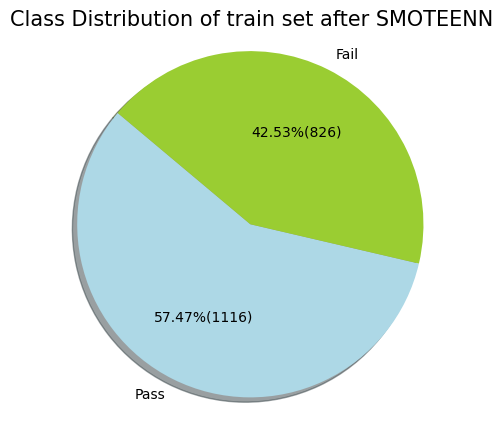

In [94]:
# Pie Chart to visualize balanced data
ClassDistributionGraph(y_resampled, 'Class Distribution of train set after SMOTEENN')

#### 5.1.1. Visualization before and after Sampling

#### - Before Resampling 

In [95]:
from sklearn.manifold import TSNE

In [104]:
tsne = TSNE(random_state=0)

y_temp_before = y_train.replace({"PASS": 0, "FAIL" :1})


In [105]:

X_tsne = X_train.merge(y_temp_before, left_index= True, right_index= True)
tsne_features = tsne.fit_transform(X_tsne)
tsne_features = pd.DataFrame(tsne_features, columns=['x','y'])

Text(0.5, 1.0, 'Before Sampling')

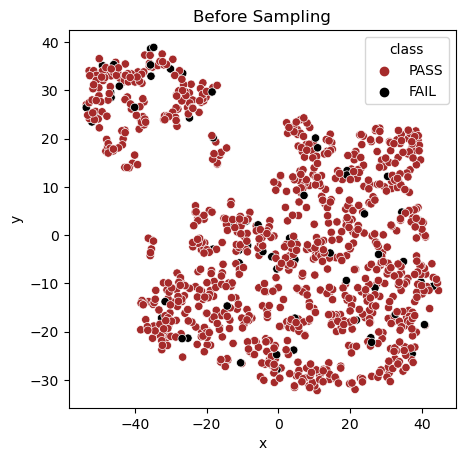

In [143]:
X_tsne['class'] = X_tsne['class'].replace({0: "PASS", 1: "FAIL"})

color_dict = dict({'PASS':'brown',
                  'FAIL':'black'
                  })


sns.scatterplot(data = tsne_features , 
                x='x' , y='y', 
                hue= X_tsne['class'], 
                legend= True, 
                palette= color_dict , cmap= True ).set_title("Before Sampling")


#### - After Resmapling with SMOTEENN

In [132]:
y_temp_after = y_resampled.replace({"PASS": 0, "FAIL" :1})


X_tsne_after = X_resampled.merge(y_temp_after, left_index= True, right_index= True)
tsne_features_after = tsne.fit_transform(X_tsne_after)
tsne_features_after = pd.DataFrame(tsne_features_after, columns=['x','y'])

Text(0.5, 1.0, 'After SMOTEENN Sampling')

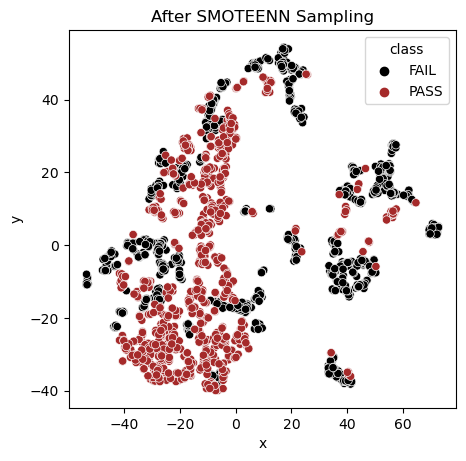

In [144]:
X_tsne_after['class'] = X_tsne_after['class'].replace({0: "PASS", 1: "FAIL"})

color_dict = dict({'PASS':'brown',
                  'FAIL':'black'
                  })

sns.scatterplot(data = tsne_features_after , 
                x='x' , y='y', 
                hue= X_tsne_after['class'], 
                legend= True, 
                palette= color_dict , cmap= True ).set_title("After SMOTEENN Sampling")

##### Note :  Oversampling techniques - SMOTE, ADASYN, ROSE and variants of SMOTE were used for imbalance treatment and each approach were compared. SMOTEENN yielded the best results.

### 5.2 Preparation of Test data

#### 5.2.1 Rough feature reduction

In [73]:
# Rough feature reduction
X_test = X_test.drop(columns = 'timestamp')
X_test = X_test.drop(columns = single_value_columns)
X_test = X_test.drop(columns = missing_value_cols)
X_test = X_test.drop(columns = features_least_volatile)


#### 5.2.2 Outlier Treatment 

In [74]:
# Number of NA before treating
print("Number of NA before outlier treatment : ", X_test.isna().sum().sum())

# Outlier treatment 
X_test = Outlier(X_test,'NaN')

# Number of NA after treating
print("Number of NA after outlier treatment : ", X_test.isna().sum().sum())

Number of NA before outlier treatment :  6167
Number of Outliers :  1543
Number of NA after outlier treatment :  7710


#### 5.2.3 Missing Value Imputation

In [75]:
# Missing Value imputation
X_test.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_test,'MICE'))

#### 5.2.4 Feature Selection 

In [76]:
# Feature selection usinf Boruta selected features
X_test = X_test.filter(final_features)

# View processed test set
X_test

,feature034,feature060,feature065,feature066,feature103,feature104,feature112,feature122,feature125,feature130,feature131,feature153,feature248,feature288,feature426,feature461,feature478,feature519,feature520,feature574
ID,,,,,,,,,,,,,,,,,,,,
364.0,8.8505,3.893600,16.106400,23.305900,0.0300,-0.0126,232.094217,15.79,15.85,0.2365,0.675500,0.808300,0.055500,0.258700,8.91530,31.3297,4.881600,0.595485,11.992400,0.185400
1126.0,8.9818,-1.604500,21.604500,26.756800,-0.0364,-0.0138,230.443000,15.81,15.70,-3.0250,0.809000,0.433900,0.047910,0.134700,4.58470,16.4619,3.803800,0.857700,9.919397,0.300600
1154.0,9.3868,-1.497300,21.497300,23.523200,0.0214,-0.0109,231.708227,15.82,15.77,-2.6470,0.841400,0.509700,0.049600,0.156700,5.13850,27.5028,4.486000,1.950341,10.692300,0.282400
48.0,9.2007,23.137300,16.862700,22.348900,-0.0320,-0.0080,230.509510,15.87,15.90,0.0946,0.748400,0.821913,0.022100,0.257301,8.51422,23.1448,9.493900,5.889336,4.757500,0.579100
1440.0,8.3675,-3.506400,23.506400,29.757400,0.0624,-0.0119,235.112200,15.71,15.73,0.0000,0.656700,0.563400,0.030024,0.167000,5.51650,25.0382,4.967100,1.030300,6.430018,0.261600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450.0,9.3181,0.434500,19.565500,27.458300,-0.0505,-0.0131,232.058500,15.82,15.79,-0.4258,0.688800,0.232400,0.022433,0.081400,2.42350,24.9760,6.046900,2.506700,5.517341,0.116600
996.0,8.2981,-0.769064,18.851423,24.664623,0.0051,-0.0103,232.512400,15.84,15.82,-2.6470,0.834900,0.211500,0.012600,0.067100,2.12650,14.3206,4.932121,1.335200,2.712300,0.291400
103.0,10.9634,20.586400,19.413600,27.364800,0.0333,-0.0069,232.184106,15.69,15.66,0.1419,0.745400,0.969900,0.169800,0.278500,10.19920,20.4190,4.797900,2.409604,36.480700,0.294095


##### Note : Test data was prepared based on the changes in train dataset. 1543 outliers were found and treated using NA values. MICE imputation was performed. And finally, features selected by Boruta were filtered.

### 5.3 Hypertuning of Parameters

#### 5.3.1 Random Forest

In [77]:

# Create the random grid
rf_params = {'n_estimators': [20, 100],
               'criterion' : ['entropy', 'gini'],
               'max_features': ['sqrt', 'auto'],
               'max_depth': [10, 20],
               'min_samples_split': [75,100],
               'min_samples_leaf': [1, 10],
               'max_samples' : [100, 200]
              }
print(rf_params)

{'n_estimators': [20, 100], 'criterion': ['entropy', 'gini'], 'max_features': ['sqrt', 'auto'], 'max_depth': [10, 20], 'min_samples_split': [75, 100], 'min_samples_leaf': [1, 10], 'max_samples': [100, 200]}


In [78]:
# Create the base model to tune
rf = RandomForestClassifier(random_state=100)

# Grid Search
rf_random = GridSearchCV(estimator = rf, param_grid = rf_params, scoring='recall', cv = 2, verbose=1, n_jobs = None)

# Fit the random search model
rf_random.fit(X_resampled, y_resampled)

Fitting 2 folds for each of 128 candidates, totalling 256 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20],
                         'max_features': ['sqrt', 'auto'],
                         'max_samples': [100, 200], 'min_samples_leaf': [1, 10],
                         'min_samples_split': [75, 100],
                         'n_estimators': [20, 100]},
             scoring='recall', verbose=1)

In [79]:
# Printing the best Parameters and best estimator

#Printing the best estimator

print('\n Best estimator:')
print(rf_random.best_estimator_)

print('\n Best hyperparameters:')
print(rf_random.best_params_)




 Best estimator:
RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       max_samples=100, min_samples_split=75, n_estimators=20,
                       random_state=100)

 Best hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 100, 'min_samples_leaf': 1, 'min_samples_split': 75, 'n_estimators': 20}


#### 5.3.2 XGBoost

In [80]:
# A parameter grid for XGBoost

params = {
    "objective" : ['binary:logistic'],
    "eval_metric"  :[ 'logloss'],
    "learning_rate"    : [ 0.68, 0.9] ,
    "max_depth"        : [ 2, 20],
    "min_child_weight" : [ 150, 200],
    "gamma"            : [ 0.06, 0.9],
    "colsample_bytree" : [ 0.9],
    "reg_alpha" : [2, 10],
    "reg_lambda" : [0.8],
    "subsample" : [0.9]
}

In [81]:
#XGBClassifier
XGB = XGBClassifier(random_state=0, verbosity=0)

# Grid Search to find the best parameters
XGB_search = GridSearchCV(XGB, param_grid=params, scoring='recall', cv=3, verbose=1)

#Fit the model
XGB_search.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=0),
             param_grid={'colsample_bytree': [0.9], 'eval_metric': ['loglos

In [82]:
#Printing the best estimator

print('\n Best estimator:')
print(XGB_search.best_estimator_)

print('\n Best hyperparameters:')
print(XGB_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0.06, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.68, max_delta_step=0,
              max_depth=2, min_child_weight=150, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=2, reg_lambda=0.8,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=0)

 Best hyperparameters:
{'colsample_bytree': 0.9, 'eval_metric': 'logloss', 'gamma': 0.06, 'learning_rate': 0.68, 'max_depth': 2, 'min_child_weight': 150, 'objective': 'binary:logistic', 'reg_alpha': 2, 'reg_lambda': 0.8, 'subsample': 0.9}


##### Note : Hyperparameter tuning was performed for RandomForest, XGBoost, DecisionTree and AdaBoost. (Here, only RF and XGBoost script is included.)

## 6. Model Evaluation 

### 6.1 Evaluation Function

In [83]:


# fucntion to build , predit and assess the model
def run_ML_process(ClassifierName,X, y, X_test, y_test, clf):
    global metrics
    
    #-------------------------------- ACCURACY --------------------------------------#
    
    #Evaluation using Startified K Fold cross validation
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(clf, X, y, cv=cv, scoring = 'accuracy')
    print('Averace Train Accuracy:', scores.mean())

    #fit
    clf.fit(X, y)
    
    #predict
    y_pred_test = clf.predict(X_test)
    
    # View accuracy score
    accuracyFinal = accuracy_score(y_test, y_pred_test)
    print('Test Accuracy : ', accuracyFinal)
    
    #--------------------------- CONFUSION MATRIX -----------------------------------#
    
    #Plot confussion matrix
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.title("Test Confusion Matrix")
    plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
    
    # View the classification report for test data and predictions
    print(classification_report(y_test, y_pred_test)) 
    sensitivityFinal = recall_score(y_test, y_pred_test, pos_label = "FAIL")
    
    
    #----------------------------------- COST ----------------------------------------#
    
    con_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
    cost_matrix = pd.DataFrame({0: [0, 1], 1: [20, 0]})
    # Apply element-wise multiplication:
    cost = con_matrix.mul(cost_matrix).to_numpy().sum()
    print("COST: ",cost)

    
    #----------------------------------- ROC ----------------------------------------#
    
    #ROC curve
    plot_roc_curve(clf, X_test, y_test, pos_label="FAIL")
    
    
    #--------------------------Evaluation metrics -----------------------------------#
    print("\n")
    if ClassifierName not in scores_df['Model']:
        metrics = {'Model' : ClassifierName,'Accuracy' :accuracyFinal,'Sensitivity': sensitivityFinal,'Cost' : cost}
        return scores_df.append(metrics, ignore_index=True)




In [84]:
# Accuracy, Sensitivty and Cost of each model are saved in a dataframe
scores_df = pd.DataFrame(columns= ['Model','Accuracy','Sensitivity','Cost'])


##### Note : . Type I error predicts a good wafer as fail and therefore represents a false alarm. The cost associated with this is disposing of a good wafer or cost of interruption of the production line. Whereas, the Type II error predicts a faulty wafer as good and therfore goes into production. This can have serious consequences. The cost associated with Type II error would be production cost of a faulty wafer, refund claims and damage to brand value. 

##### To highlight the importance of Type II error, an assumption about the cost is made. Cost of Type I  :  Cost of Type II = 1:20.

### 6.2 Model

#### Model I : Random Forest 

Averace Train Accuracy: 0.8069336505418979
Test Accuracy :  0.697452229299363
              precision    recall  f1-score   support

        FAIL       0.14      0.79      0.24        19
        PASS       0.98      0.69      0.81       295

    accuracy                           0.70       314
   macro avg       0.56      0.74      0.53       314
weighted avg       0.93      0.70      0.78       314

COST:  171




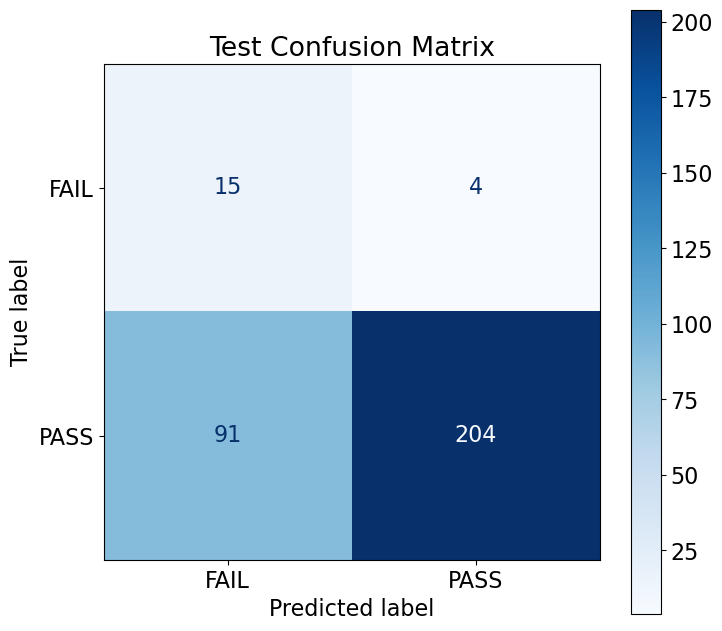

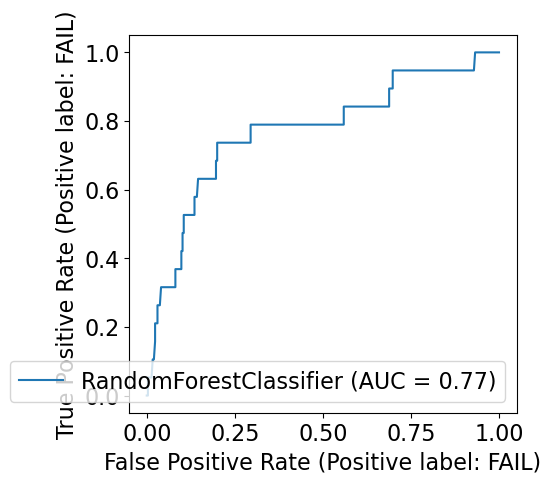

In [85]:
# with hyper parameter tuning
scores_df = run_ML_process("RandomForest", X_resampled, y_resampled, X_test, y_test,rf_random.best_estimator_)

#### Model II : XGBoost 

Averace Train Accuracy: 0.7713798572561459
Test Accuracy :  0.7070063694267515
              precision    recall  f1-score   support

        FAIL       0.15      0.79      0.25        19
        PASS       0.98      0.70      0.82       295

    accuracy                           0.71       314
   macro avg       0.56      0.75      0.53       314
weighted avg       0.93      0.71      0.78       314

COST:  168




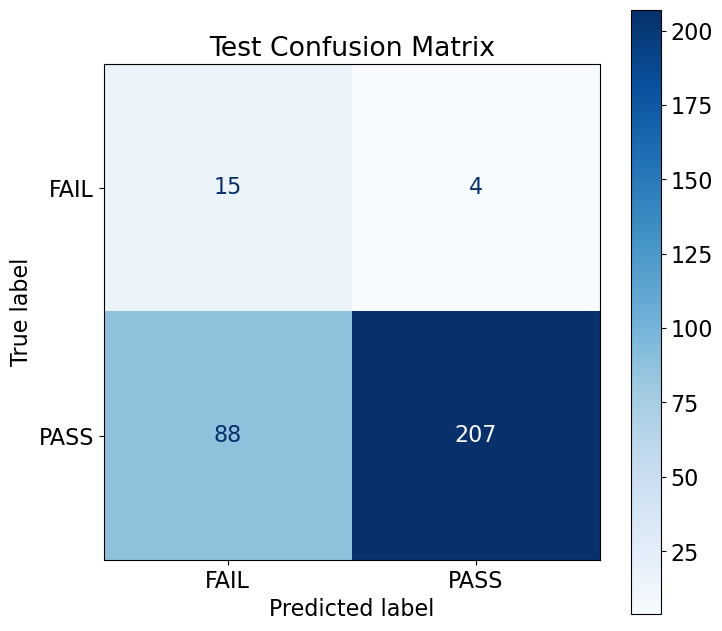

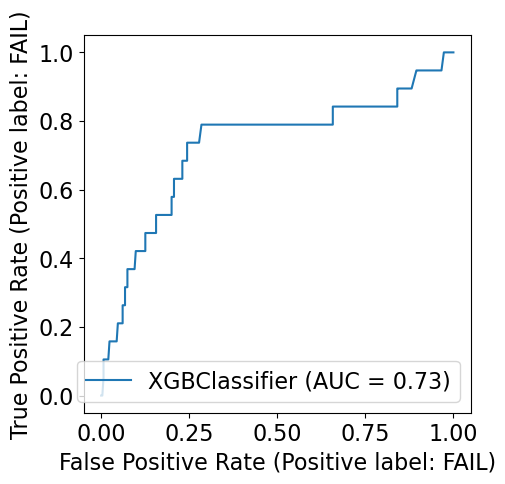

In [86]:
scores_df = run_ML_process("XGBoost",X_resampled, y_resampled, X_test, y_test, XGB_search.best_estimator_)

#### Model III : Decision Tree

Averace Train Accuracy: 0.7683029341792228
Test Accuracy :  0.5764331210191083
              precision    recall  f1-score   support

        FAIL       0.10      0.74      0.17        19
        PASS       0.97      0.57      0.72       295

    accuracy                           0.58       314
   macro avg       0.53      0.65      0.44       314
weighted avg       0.92      0.58      0.68       314

COST:  228




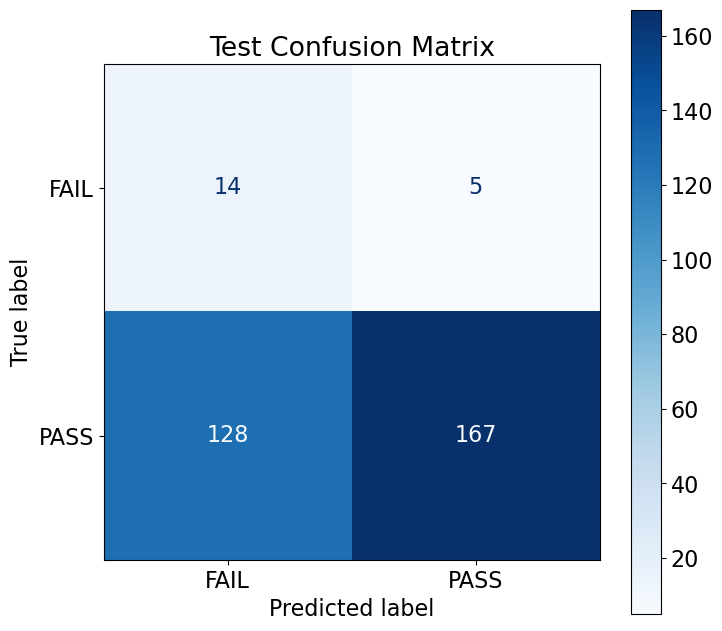

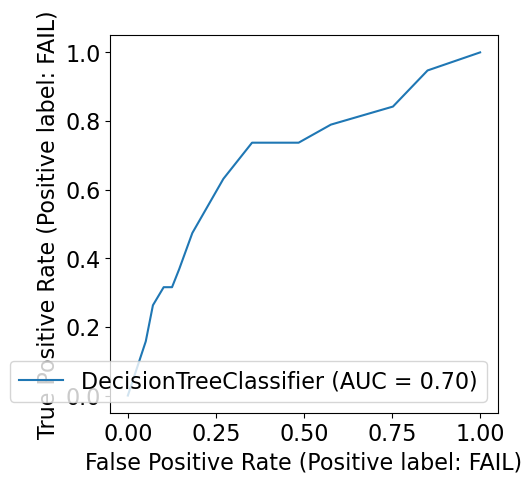

In [87]:
scores_df =run_ML_process("DecisonTree",X_resampled, y_resampled, X_test, y_test, DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_features ='auto', min_samples_leaf= 100, min_samples_split= 100 ,random_state=100))

#### Model IV : AdaBoost

Averace Train Accuracy: 0.814142215173143
Test Accuracy :  0.7643312101910829
              precision    recall  f1-score   support

        FAIL       0.14      0.58      0.23        19
        PASS       0.97      0.78      0.86       295

    accuracy                           0.76       314
   macro avg       0.55      0.68      0.55       314
weighted avg       0.92      0.76      0.82       314

COST:  226




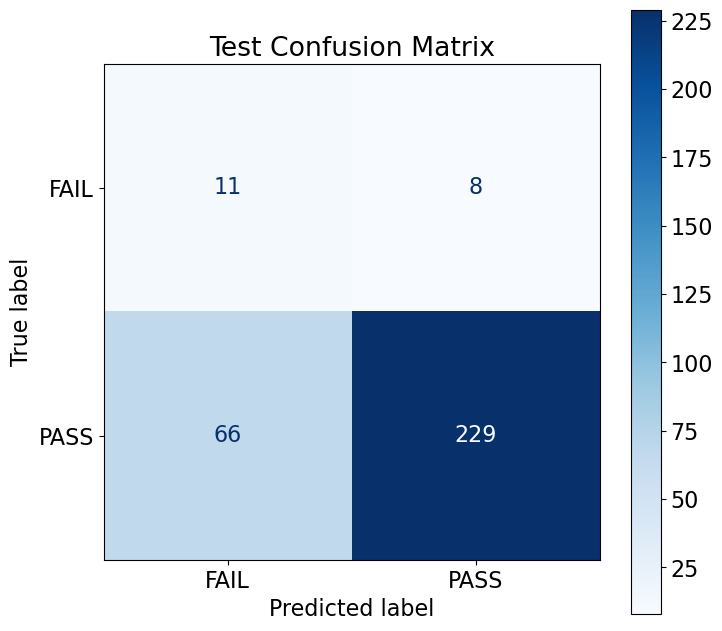

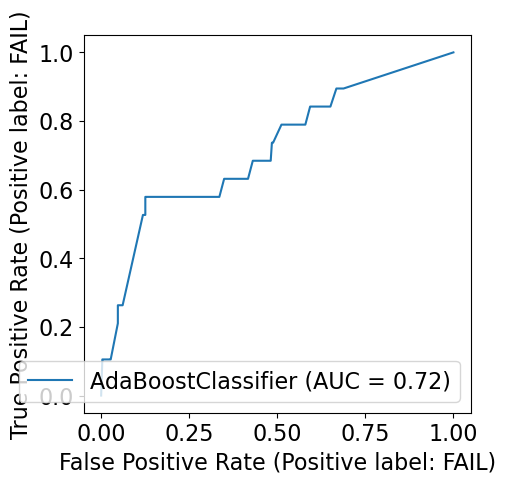

In [88]:
scores_df =run_ML_process("AdaBoost",X_resampled, y_resampled, X_test, y_test, 
                          AdaBoostClassifier(DecisionTreeClassifier(
                              max_depth=8, 
                              min_samples_split=100, 
                              min_samples_leaf=200),
                                             n_estimators =10,  
                                             algorithm = 'SAMME.R', 
                                             learning_rate=0.01))

### 6.2 Performance Comparison

#### 6.2.1 Evaluation metrics

In [89]:
scores_df

,Model,Accuracy,Sensitivity,Cost
0,RandomForest,0.697452,0.789474,171
1,XGBoost,0.707006,0.789474,168
2,DecisonTree,0.576433,0.736842,228
3,AdaBoost,0.764331,0.578947,226


#### 6.2.2 Comparison of Accuracy

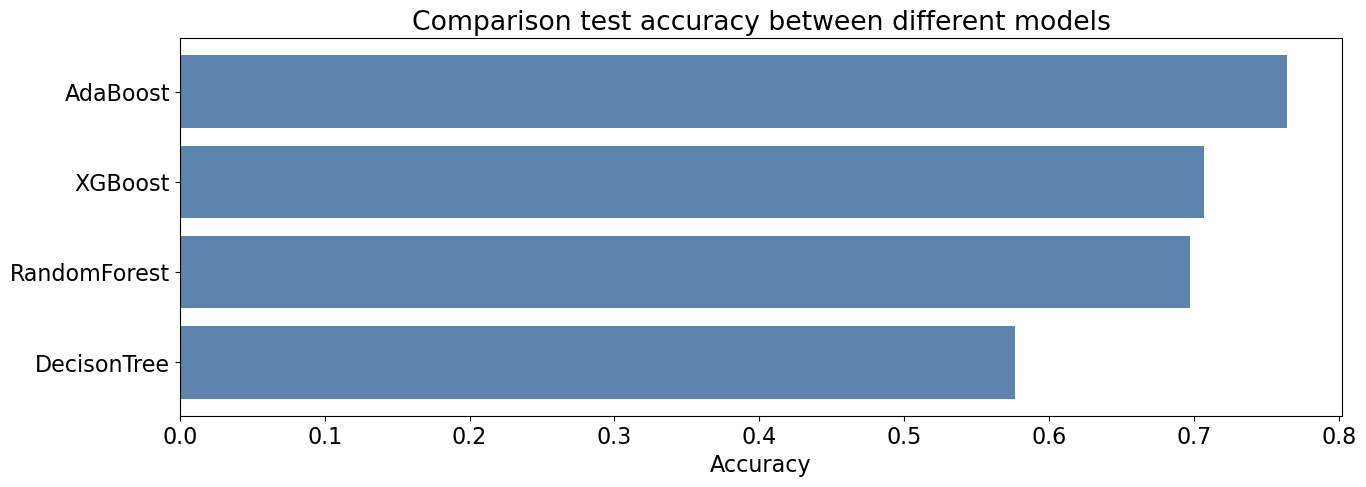

In [90]:
# draw the accuracy with horizontal bars
fig, ax = plt.subplots(figsize=(15,5))

# Sort the scores_df in descending order by accuracy
scores_acc = scores_df.sort_values(by = 'Accuracy', ascending = False)

model_list = scores_acc.loc[:,'Model']
y_pos = np.arange(len(model_list))

ax.barh(y_pos,scores_acc.loc[:,'Accuracy'] ,align = 'center', color=(0.2, 0.4, 0.6, 0.8))
ax.set_yticks(y_pos)
ax.set_yticklabels(model_list)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Comparison test accuracy between different models')

plt.show()

#### 6.2.3 Compariosn of Sensitivity / Recall

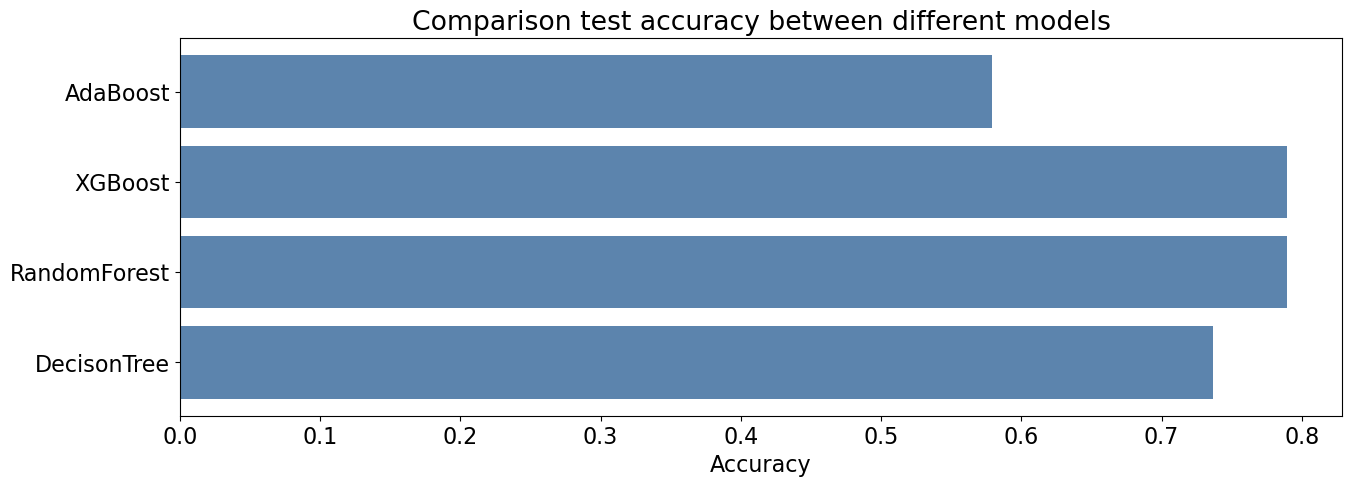

In [91]:
# draw the accuracy with horizontal bars
fig, ax = plt.subplots(figsize=(15,5))

# Sort the scores_df in descending order by accuracy
scores_acc = scores_df.sort_values(by = 'Accuracy', ascending = False)

model_list = scores_acc.loc[:,'Model']
y_pos = np.arange(len(model_list))

ax.barh(y_pos,scores_acc.loc[:,'Sensitivity'] ,align = 'center', color=(0.2, 0.4, 0.6, 0.8))
ax.set_yticks(y_pos)
ax.set_yticklabels(model_list)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Comparison test accuracy between different models')

plt.show()

#### 6.2.4 Compariosn of Cost

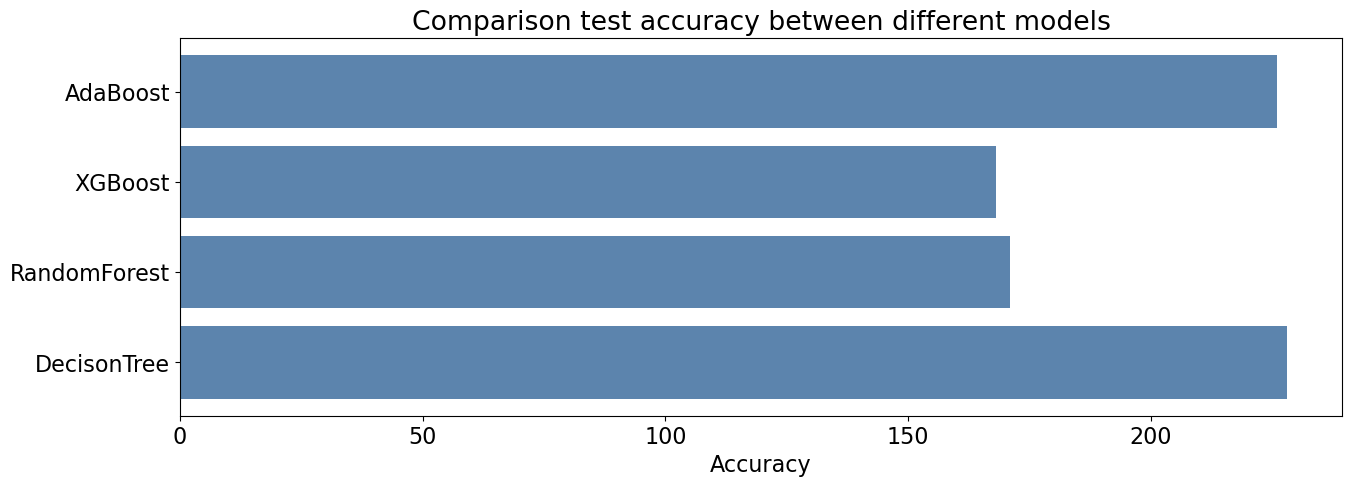

In [92]:
# draw the accuracy with horizontal bars
fig, ax = plt.subplots(figsize=(15,5))

# Sort the scores_df in descending order by accuracy
scores_acc = scores_df.sort_values(by = 'Accuracy', ascending = False)

model_list = scores_acc.loc[:,'Model']
y_pos = np.arange(len(model_list))

ax.barh(y_pos,scores_acc.loc[:,'Cost'] ,align = 'center', color=(0.2, 0.4, 0.6, 0.8))
ax.set_yticks(y_pos)
ax.set_yticklabels(model_list)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Comparison test accuracy between different models')

plt.show()

In [93]:
end = time.time()
print('Run time:',end - start)

Run time: 1816.321349620819


##### Summary : Based on our business case, it is important to reduce the type II error while finding a trade off with Type I error using a cost analysis approach This is achieved with the XGBoost model.